### 군집
- 각 군집화 기법은 나름의 장단점을 가지고 있으며 군집화하려는 데이터의 특성에 맞게 수행해야 함
- K-평균의 경우 거리(유클리드) 기반으로 군집 중심점을 이동시키면서 군집화를 수행. 매우 직관적인 알고리즘으로 많은 군집화 애플리케이션에 애용되지만 복잡한 구조를 가지는 데이터세트에 적용하기에는 한계가 있음. 평가는 실루엣 계수를 이용
- 평균이동(Mean Shift)은 K-평균과 유사하나 거리 중심이 아니고 데이터가 모여있는 밀도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집화를 수행. 컴퓨터 비전 영역에서 이미지나 영상 데이터의 특정 개체 구분에 적합한 알고리즘
- GMM(Gausian Mixture Model)은 군집화를 적용하고자 하는 데이터를 여러 개의 가우시안 분포 모델을 섞어서 생성된 모델로 가정해 수행하는 방식. K-평균 보다 유연하고 다양한 데이터 세트에 잘 적용될 수 있으나 수행 시간이 오래 걸림
- DBSCAN(Density Based Spatial Clustering of Applications with Noise)은 밀도 기반 군집화의 대표적인 알고리즘으로 데이터의 분포가 기하학적으로 복잡한 데이터 세트에 효과적인 군집화가 가능함

In [15]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, 
                       columns=['sepal length','sepal width','petal length','petal width'])
df_iris.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
kmeans = KMeans(n_clusters=3, init='k-means++', 
                max_iter=300,random_state=0).fit(df_iris)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [17]:
df_iris['cluster'] = kmeans.labels_
df_iris.head()

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [18]:
df_iris['target'] = iris.target
df_iris.head()

,sepal length,sepal width,petal length,petal width,cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [19]:
#target과 cluster가 정확히 됐는지 groupby후 count를 이용하여 비교
iris_result = df_iris.groupby(['target','cluster']).count()
iris_result

sepal length  sepal width  petal length  petal width
target cluster                                                      
0      1                  50           50            50           50
1      0                   2            2             2            2
       2                  48           48            48           48
2      0                  36           36            36           36
       2                  14           14            14           14

In [ ]:
# target 0은 1로 50개 정확히 분리
# target 1는 2로 48개 정확히 분리, 2개 오류
# target 2는 0으로 36개 정확히 분리, 14개 오류

In [22]:
# 4개의 붓꽃데이터 속성은 2차원 평면상에 적합치 않아 PCA를 이용 4개의 속성을 
# 2개 차원 축소한 뒤에 X좌표, Y좌표로 개별 데이터를 표현
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [23]:
#(150,4)였던 데이터가 (150,2)로 축소됨
pca_transformed.shape

(150, 2)

In [7]:
df_iris['pca_x'] = pca_transformed[:,0]
df_iris['pca_y'] = pca_transformed[:,1]
df_iris.head()

,sepal length,sepal width,petal length,petal width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


Text(0.5, 1.0, '3 Clusters Visualization by 2 PCA Components')

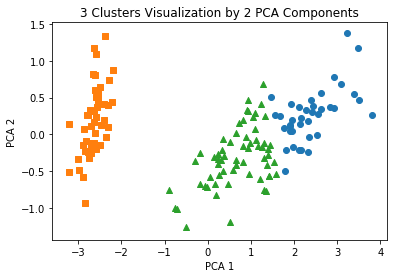

In [8]:
# cluster 값이 0,1,2인 경우마다 별도의 index로 추출
mark0_ind = df_iris[df_iris.cluster==0].index
mark1_ind = df_iris[df_iris.cluster==1].index
mark2_ind = df_iris[df_iris.cluster==2].index

plt.scatter(x=df_iris.loc[mark0_ind,'pca_x'], 
            y=df_iris.loc[mark0_ind,'pca_y'],marker='o')
plt.scatter(x=df_iris.loc[mark1_ind,'pca_x'], 
            y=df_iris.loc[mark1_ind,'pca_y'],marker='s')
plt.scatter(x=df_iris.loc[mark2_ind,'pca_x'], 
            y=df_iris.loc[mark2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')

In [ ]:
# 데이터를 유사한 그룹끼리 분리할 수 있다면
# 고객세그멘테이션(ex- 고객유형컬럼)을 할때 사용
# 분석과정중에 그룹핑을 한 후, 그룹핑 한 데이터들만 가지고 그에 맞는 모델을 적용시킬 수도 있다.
# 군집화는 다양하게 활용가능하다!!

### 군집 평가
- 실루엣 분석으로 평가, 이를 위해 metrics 모듈의 silhouette_samples, silhouette_score을 이용

- 대부분의 군집화 데이터 세트는 타겟 레이블을 가지고 있지 않다.

- 비지도 학습의 특성상 정확하게 성능을 평가하기 어렵지만 군집화의 성능을 평가하는 방법으로 실루엣 분석 이용
- 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는 지를 나타냄.
- 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
- 실루엣 계수는 -1에서 1사이의 값을 가지며 1로 가까워질수록 근처의 군집과 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것임.
    -실루엣 계수 : s(i) = b(i) - a(i))/max(a(i),b(i)
        -a(i) : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
        -b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리
        - -(마이너스)값은 아예 다른 군집에 테이터 포인트가 할당되었음을 의미
- silhouette_samples : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해 주면 각 데이터 포인트의 실루엣 계수를 반환
- silhouette_score : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해 주면 전체 데이터의 실루엣 계수 값을 평균해 반환. 즉 np.mean(silhouette_samples())과 같음. 이 값이 높을수록 군집화가 잘 됐다고 판단할 수 있지만 무조건 높다고 해서 군집화가 잘되었다고는 할 수 없다.
- 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
df_iris = pd.DataFrame(data=iris.data, columns = feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', 
                max_iter=300, random_state=0).fit(df_iris)
df_iris ['cluster'] = kmeans.labels_

# 실루엣 갯수 반환, 실루엣갯수는 관측치값
score_samples = silhouette_samples(iris.data, df_iris['cluster'])
print(score_samples)
print(score_samples.shape)

df_iris['silhouette_coeff'] = score_samples

average_score = silhouette_score(iris.data, df_iris['cluster'])

#1이 만점인데 평균이 0.55
print('score:{:.4f}'.format(average_score))
print(np.mean(score_samples))
df_iris.head()

[0.85295506 0.81549476 0.8293151  0.80501395 0.8493016  0.74828037
 0.82165093 0.85390505 0.75215011 0.825294   0.80310303 0.83591262
 0.81056389 0.74615046 0.70259371 0.64377156 0.77568391 0.85101831
 0.70685782 0.82030124 0.78418399 0.82590584 0.79297218 0.7941134
 0.77503635 0.79865509 0.83346695 0.84201773 0.84364429 0.81784646
 0.81518962 0.79899235 0.76272528 0.72224615 0.82877171 0.83224831
 0.79415322 0.84188954 0.76856774 0.85033231 0.84941579 0.63900017
 0.78657771 0.80023815 0.74698726 0.80977534 0.81340268 0.81902059
 0.8182324  0.85209835 0.02672203 0.38118643 0.05340075 0.59294381
 0.36885321 0.59221025 0.28232583 0.26525405 0.34419223 0.57829491
 0.37478707 0.58710354 0.55107857 0.48216686 0.56310057 0.32459291
 0.55751057 0.61072967 0.46149897 0.6115753  0.32909528 0.58968904
 0.31046301 0.49424779 0.5000461  0.38548959 0.12629433 0.11798213
 0.55293611 0.5069822  0.59466094 0.5607585  0.61972579 0.26087292
 0.54077013 0.41598629 0.16655431 0.48935747 0.60716023 0.61436

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [28]:
df_iris.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

In [29]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

<Figure size 2160x1080 with 0 Axes>

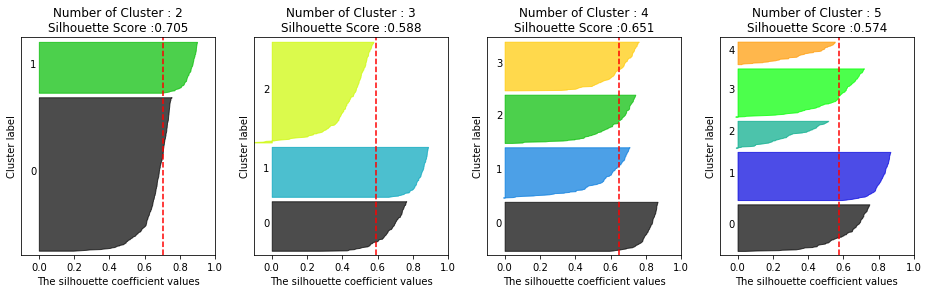

In [36]:
# make_blobs를 통해 clustering을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성

from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                center_box=(-10.0,10.0), shuffle=True, random_state=1)

# cluster 개수를 2,3,4,5개일때의 클러스터별 실루엣 계수 평균값을 시각화
# 4개의 군집일 때 가장 최적
# plt.figure(figsize=(30,15))
visualize_silhouette([2,3,4,5], X)

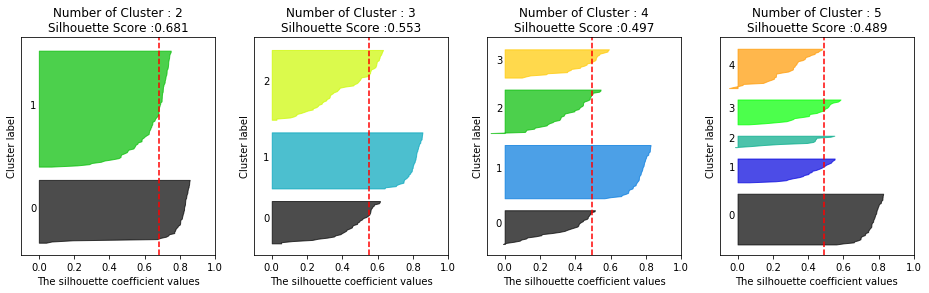

In [37]:
from sklearn.datasets import load_iris

iris=load_iris()
visualize_silhouette([2,3,4,5], iris.data)

In [ ]:
# iris data는 두 군집의 실루엣 계수와 실루엣 스코어를 고려해봤을 때 
# 군집 계수를 2개로 하는 것이 가장 좋다.

In [ ]:
# 실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 
# 데이터세트가 늘어나면 수행시간이 오래 걸리므로, 이 경우 군집별로 임의의 데이터를 샘플링해
# 실루엣 계수를 평가하는 방안을 고민해야 한다.